# Regresión Logística Binomial

## Craga de Datos

In [182]:
import pandas as pd
import numpy as np

In [183]:
# El CSV contiene datos sobre una compañiade Telecomunicaciones
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [184]:
# Con "head" podemos indicar cuantas filas queremos que nos muestre
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpieza de Datos

### Analizar Datos

In [185]:
# Con "info" vemos la información de estructura de la tabla
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar los datos de la columna TotalCharges a valores numéricos

In [186]:
# "to_numeric" es el metodo de pandas para convertir a valores numéricos
# errors='coerce' indica que manejará los errores asignandoles un valos NaN
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

### Manejo de Datos Nulos

In [187]:
# Suma la cantidad de valores nulos
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [188]:
# "dropna" elimina todas las filas que contienen al menos un valor NaN
# "inplace=True" indica que los cambios se realizarán en el df original
# "inplace=False" indica que los cambios se realizarán en un nuevo df manteniendo el original
df_data.dropna(inplace=True)

In [189]:
# Confirmamos que se eliminaron los valores nulos
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Eliminar la columna customerID

In [190]:
# "drop" metodo para eliminar datos de filas o columnas
# "axis" indica el eje a ejecutar una operación: 1=columnas, 0=filas
df_data.drop('customerID', axis=1, inplace=True)

In [191]:
# Confirmo que se eliminó la columna
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convertir a numérico la variable objetivo (Churn)

In [192]:
# Convertimos los datos del campo Chrun en datos numéricos
# Churn es un evento cuando alguien deja una compañia,organización o servicio
df_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [193]:
# Confirmo que se realizaron los cambios
df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [194]:
# Guardamos una copia de nuestros datos procesados usando "copy()"
df_data_processing = df_data.copy()

Manejo de Variables Categóricas

In [195]:
# con "get_dummies" cada categoría se representa como una nueva columna y se asigna un valor boolean
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

# otra forma en que sin dividir las categorías en columnas le asignamos un valor binario o boolean
# df_data_processing = pd.get_dummies(df_data_processing, drop_first=True).astype(int)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [196]:
# Identificar las columnas booleanas
columnas_booleanas = df_data_processing.select_dtypes(include='bool').columns
# Convertir las columnas booleanas a valores numéricos
df_data_processing[columnas_booleanas] = df_data_processing[columnas_booleanas].astype(int)

In [197]:
# Visualizamos para confirmar los cambios
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Analisis de Correlación

In [198]:
import matplotlib.pyplot as plt

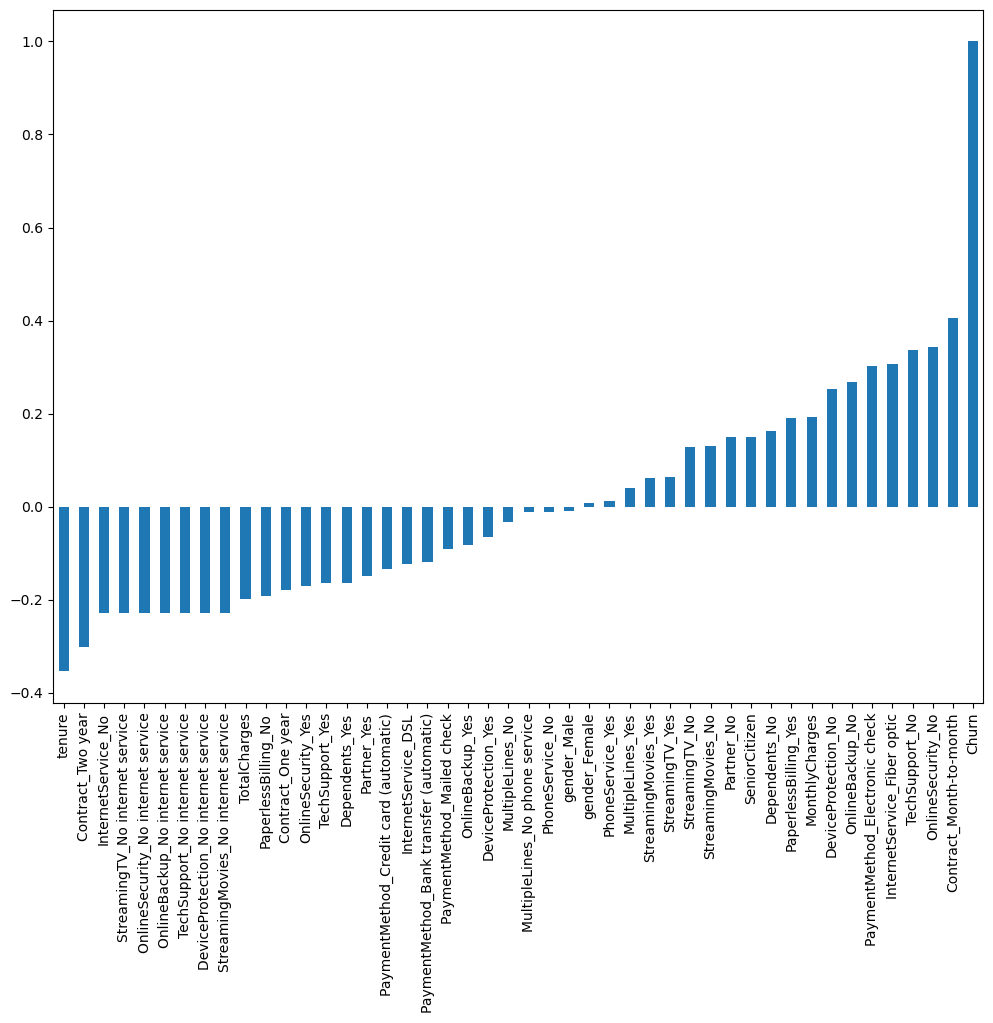

In [199]:
fig = plt.figure(figsize=(12,9))
# Muestra la correlación de todas la columnas del dataset con la columna 'Churn'
# "sort_values(ascending=True)" indica que ordenará los datos de forma ascendente
# "plot(kind='bar')" Crea un gráfico de barras
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

### Escalar Datos

In [200]:
from sklearn.preprocessing import MinMaxScaler

In [201]:
# Asignamos el metodo para escalar datos a una variable
scaler = MinMaxScaler()
# Escalamos los datos con fit_transform, retorna un array
df_data_processing_scaled = scaler.fit_transform(df_data_processing)
# Lo convertimos en un data frame
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
# Le asignamos los nombres de las columnas
df_data_processing_scaled.columns = df_data_processing.columns

In [202]:
# Comprobamos los cambios
df_data_processing_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Análisis exploratorio de Datos

In [203]:
import seaborn as sns

In [204]:
# Creamos una función para analizar los datos categóricon con la variable Objetivo
def plot_categorial(column):
  fig = plt.figure(figsize=(8,5))
  # "countplot" muestra en una grafica la distribución de datos categóricos
  # "hue" muestra la relación del canmpo 'Churn' con las categorías
  sns.countplot(data=df_data, x=column, hue='Churn')
  plt.show()

In [205]:
# Selecciona los nombres de las columnas con datos de tipo 'object'
column_cat = df_data.select_dtypes(include='object').columns

AttributeError: 'numpy.int64' object has no attribute 'startswith'

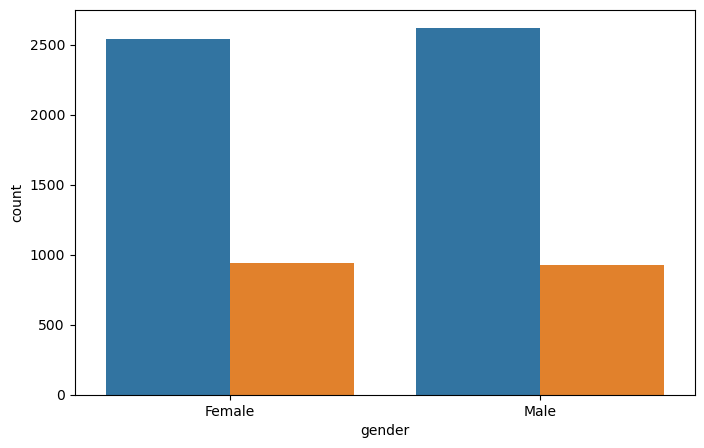

In [206]:
# Ejecutamos la función "plot_categorial" por cada una de nuestras columnas
for _ in column_cat:
        plot_categorial(_)

In [ ]:
# Creamos una función para analizar los datos numéricos con la variable Objetivo
fig = plt.figure(figsize=(6,8))
# "pairplot" crea graficos de dispersión
sns.pairplot(data=df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de Regresión Logística Binomial

In [ ]:
# Separamos nuestros datos en variables indenpendientes y nuestra variable dependiente
# Eliminamos el campo Churn para quedarnos con la variables independientes
x = df_data_processing_scaled.drop('Churn', axis = 1)
# Separamos en nuestra variable objetivo (variable dependiente)
y = df_data_processing_scaled['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split
# Separando datos de entrenamiento y prueba (test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# importamos el modelo matemático a implementar
from sklearn.linear_model import LogisticRegression
# Guardamos el modelo en una variable
model = LogisticRegression()
# accedemos al meto 'fit' de nuestro modelo para hacer el entrenamiento
result = model.fit(x_train, y_train)

In [ ]:
from sklearn import metrics
# usmos el modelo para realizar una predicción con los datos de prueba
prediction_test = model.predict(x_test)
# comprobamos porcentaje de precisión
print(metrics.accuracy_score(y_test, prediction_test))

### Ejemplo Regularización

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes con el objetivo de evitar el overfitting y mejorar la precición de predicción de nuestro modelo

**Tipos de regularización - Penalidad**

. L1 Lasso:
    Penaliza a los features que aporta poca información volviéndolos cero, es útil cuando se tiene un gran número de características y se sospecha que solo unas pocas son realmente importantes
    
. L2 Ridge:
    Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo, es útil en presencia de multicolinealidad, donde las características están altamente correlacionadas
    
. elasticnet:
    Combina las dos penalizaciones anteriores en una sola función, en vez de C usa l1_ratio con valores entre 0 a 1, si el valor es 1 se comporta como Lasso y si es 0 se comporta como Ridge
    

_NOTA: Para decidir cuál es el mejor en la práctica, podemos probar usando alguna técnica como cross-validation iterativamente_

**Ajuste de Lambda - C**

C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [ ]:
# Implementamos una penalidad (l1) y jugamos con los valores de C 
model = LogisticRegression(max_iter=10000, penalty='l1',solver='saga', C=0.2)
result = model.fit(x_train, y_train)
# Realizamos una prediición con los ajustes anteriores del modelo
prediction_test = model.predict(x_test)
# Evaluamos el porcentaje de precisión
print(metrics.accuracy_score(y_test, prediction_test))

## Evaluación del modelo

### Observando la probabilidad de cada Dato

In [ ]:
# Predice la probabilidad de cada unos de los datos (x_test) en convertirse 0 o 1
model.predict_proba(x_test)

El primer elemento del resultado [0.99021183, 0.00978817] indica que:

    - 0.99021183 de probabilidad en convertirse 0
    - 0.00978817 de probabilidad en convertirse 1

### Observando los Coeficientes de las variables

In [ ]:
# Muestra la importancia que tienen los variable independientes para hacer una predicción
model.coef_

Los numeros positivos indican la importancia que tiene una variable para predecir cuando un dato sea 1
Los numeros negativos indican la importancia que tiene una variable para predecir cuando un dato sea 0

In [ ]:
# Observando los features (variables) a las que le pertenecen los coeficientes anteriores
model.feature_names_in_

In [ ]:
# Series se usa para crea una estructura con datos unidimensionales
# Uso model.coef_[0] por que model.coef_ retorna los coeficientes en un array dentro de otro array
# " index=x.columns " Recibe los nombres de las columnas
weights = pd.Series(model.coef_[0], index=x.columns)
# sort_values permite ordenar los valores, en mi caso lo hago de manera descendente 'ascending=False'
# [:10] como su orden es descendente, seleccionamos los 10 primeros datos que son los mas grandes
# plot(kind='bar') Indicamos que muestre un gráfico de tipo barra
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

- El grafico anterior muestra la variables con los coeficientes más altos
- El nivel del coeficiente indica que tanto afecta a que un cliente haga Churn

In [ ]:
# Ahora visualizamos los últimos 10 valores
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

- El grafico anterior muestra la variables con los coeficientes más bajos- Una variable con un coeficiente bajo indica que la probabilidad de que un cliente hacha Chrun será bajan

**En futuros entrenamientos prodríamos eliminar aquella variables que aportan poca información para predecir si un cliente hará Churn o no lo hará**

### Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
fig = plt.figure(figsize=(10,8))
# Creando la matriz de confusión con y_test y las predicciones
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
# Dando estilo a la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ )
# Indicando el mapa de color a implementar
disp.plot(cmap='gray')
# Mostrar gráfico
plt.show()

El grafico indica que:
- Cuando el valor real era 0 la predicción acertó 1381 veces y se equivocó 263
- Cuando el valor real era 1 la predicción acertó 298 veces y se equivocó 168

La razón por que hay una gran diferencia entre aciertos de valores 0 y 1 es debido a que nuestros datos no estaban balanceado, posiblemente se deba a que había más información de personas que hacían Churn de las que no lo hacían